> Required Imports

In [1]:
from keras.layers import Activation, Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
import numpy as np
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from os.path import exists
from config import CONFIG

import warnings
warnings.filterwarnings('ignore')

> Load data for training

In [2]:
with open(CONFIG.get("files", "train_test_data"), 'rb') as f:
    X_train = np.load(f)
    y_train = np.load(f)
    X_test = np.load(f)
    y_test = np.load(f)

input_shape=X_train[0].shape

> Build a VGG-16 Neural Network model

In [3]:
savepath1 = CONFIG.get("files", "recog_model")
savepath2 = CONFIG.get("files", "recog_history")

if exists(savepath1):
    model = keras.models.load_model(savepath1)
    display(model.summary())
    history = pd.read_csv(savepath2)
else:
    # Build a VGG-16 Model
    model = Sequential()
    model.add(Conv2D(input_shape=(128,171,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=26, activation="softmax"))

    # Compile the model
    model.compile(
	    optimizer = Adam(learning_rate=0.001),
	    loss = "categorical_crossentropy",
	    metrics = ['accuracy'])
    display(model.summary())

    # Fit the training data on the model
    history = model.fit(
        x=X_train,
        y=y_train,
        epochs=50,
        batch_size=128,
        validation_data= (X_test, y_test))

    # Save files
    model.save(savepath1)
    history = pd.DataFrame(history.history)
    history.to_csv(savepath2, index=None)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 171, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 171, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 85, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 85, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 85, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 42, 128)      0         
 2D)                                                    

None

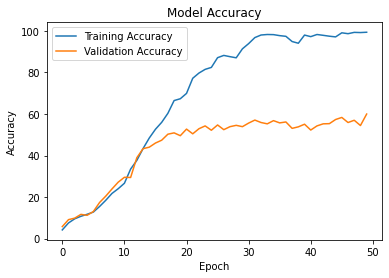

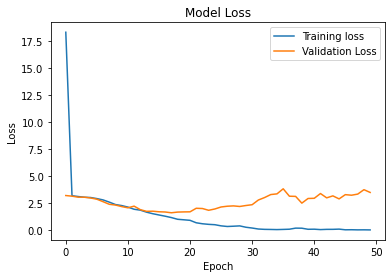

In [4]:
plt.plot(np.array(history["accuracy"])*100)
plt.plot(np.array(history['val_accuracy'])*100)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training loss","Validation Loss"])
plt.show()